#Importing all the required libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

#Reading the csv Files

In [46]:
accidents_filepath = '/Users/shalinimopuri/Desktop/archive/Accidents0515.csv'
casualities_filepath = '/Users/shalinimopuri/Desktop/archive/Casualties0515.csv'
vehicles_filepath = '/Users/shalinimopuri/Desktop/archive/Vehicles0515.csv'

accidents = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Accidents0515.csv',index_col='Accident_Index')
casualities = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Casualties0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Vehicles0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

#ACCIDENTS DATASET

In [47]:
df1 = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Accidents0515.csv', delimiter=',', nrows = 1000)
df1.dataframeName = 'Accidents0515.csv'
Row_1, Col_1 = df1.shape
print(f'There are {Row_1} rows and {Col_1} columns')

There are 1000 rows and 32 columns


In [48]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [49]:
accidents.shape

(1780653, 31)

In [50]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780653 entries, 200501BS00001 to 2015984141415
Data columns (total 31 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Location_Easting_OSGR                        float64
 1   Location_Northing_OSGR                       float64
 2   Longitude                                    float64
 3   Latitude                                     float64
 4   Police_Force                                 int64  
 5   Accident_Severity                            int64  
 6   Number_of_Vehicles                           int64  
 7   Number_of_Casualties                         int64  
 8   Date                                         object 
 9   Day_of_Week                                  int64  
 10  Time                                         object 
 11  Local_Authority_(District)                   int64  
 12  Local_Authority_(Highway)                    object 
 13 

In [51]:
accidents.duplicated().sum()

32

In [52]:
accidents.drop_duplicates(inplace=True)

In [53]:
accidents.isnull().sum()

Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

#Data Cleaning

In [54]:
columns_to_find_mode = ["Time", "Location_Easting_OSGR", "Location_Northing_OSGR", "LSOA_of_Accident_Location"]

for column in columns_to_find_mode:
    mode_value = accidents[column].mode()
    print(column, mode_value)

Time 0    17:00
Name: Time, dtype: object
Location_Easting_OSGR 0    533650.0
Name: Location_Easting_OSGR, dtype: float64
Location_Northing_OSGR 0    181310.0
Name: Location_Northing_OSGR, dtype: float64
LSOA_of_Accident_Location 0    E01000004
Name: LSOA_of_Accident_Location, dtype: object


In [55]:
columns_to_fill = ["Time", "Location_Easting_OSGR", "Latitude", "Longitude", "Location_Northing_OSGR", "LSOA_of_Accident_Location"]

for column in columns_to_fill:
    accidents[column].fillna(accidents[column].mode()[0], inplace=True)

#Checking wether there are any null values in the table using .isnull()

In [56]:
accidents.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [57]:
accidents.isnull().head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200501BS00002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200501BS00003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200501BS00004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200501BS00005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
accidents.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
Junction_C

#CASUALITIES DATASET

In [59]:
df2 = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Casualties0515.csv', delimiter=',', nrows = 1000)
df1.dataframeName = 'Casualities0515.csv'
Row_2, Col_2 = df2.shape
print(f'There are {Row_2} rows and {Col_2} columns')

There are 1000 rows and 15 columns


In [60]:
casualities.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [61]:
casualities.shape

(2216720, 14)

In [62]:
casualities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216720 entries, 200501BS00001 to 2014984139614
Data columns (total 14 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Vehicle_Reference                   int64
 1   Casualty_Reference                  int64
 2   Casualty_Class                      int64
 3   Sex_of_Casualty                     int64
 4   Age_of_Casualty                     int64
 5   Age_Band_of_Casualty                int64
 6   Casualty_Severity                   int64
 7   Pedestrian_Location                 int64
 8   Pedestrian_Movement                 int64
 9   Car_Passenger                       int64
 10  Bus_or_Coach_Passenger              int64
 11  Pedestrian_Road_Maintenance_Worker  int64
 12  Casualty_Type                       int64
 13  Casualty_Home_Area_Type             int64
dtypes: int64(14)
memory usage: 253.7+ MB


In [63]:
casualities.duplicated().sum()

1977838

In [64]:
casualities.drop_duplicates(inplace=True)

#Checking wether there are any null values in the table using .isnull()

In [65]:
casualities.isnull().sum()

Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

In [66]:
casualities.isnull().head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200501BS00002,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200501BS00003,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200501BS00004,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200501BS00005,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
casualities.dtypes

Vehicle_Reference                     int64
Casualty_Reference                    int64
Casualty_Class                        int64
Sex_of_Casualty                       int64
Age_of_Casualty                       int64
Age_Band_of_Casualty                  int64
Casualty_Severity                     int64
Pedestrian_Location                   int64
Pedestrian_Movement                   int64
Car_Passenger                         int64
Bus_or_Coach_Passenger                int64
Pedestrian_Road_Maintenance_Worker    int64
Casualty_Type                         int64
Casualty_Home_Area_Type               int64
dtype: object

#VEHICLES DATASET

In [68]:
df3 = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Vehicles0515.csv', delimiter=',', nrows = 1000)
df3.dataframeName = 'Vehicles0515.csv'
Row_3, Col_3 = df3.shape
print(f'There are {Row_3} rows and {Col_3} columns')

There are 1000 rows and 22 columns


In [69]:
vehicles.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [70]:
vehicles.shape

(3004425, 21)

In [71]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype
---  ------                            -----
 0   Vehicle_Reference                 int64
 1   Vehicle_Type                      int64
 2   Towing_and_Articulation           int64
 3   Vehicle_Manoeuvre                 int64
 4   Vehicle_Location-Restricted_Lane  int64
 5   Junction_Location                 int64
 6   Skidding_and_Overturning          int64
 7   Hit_Object_in_Carriageway         int64
 8   Vehicle_Leaving_Carriageway       int64
 9   Hit_Object_off_Carriageway        int64
 10  1st_Point_of_Impact               int64
 11  Was_Vehicle_Left_Hand_Drive?      int64
 12  Journey_Purpose_of_Driver         int64
 13  Sex_of_Driver                     int64
 14  Age_of_Driver                     int64
 15  Age_Band_of_Driver                int64
 16  Engine_Capacity_(CC)              int64
 17  Propulsion_Cod

In [72]:
vehicles.duplicated().sum()

247482

In [73]:
vehicles.drop_duplicates(inplace=True)

#Checking wether there are any null values in the table using .isnull()

In [74]:
vehicles.isnull().sum()

Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
dtype: int64

In [75]:
vehicles.dtypes

Vehicle_Reference                   int64
Vehicle_Type                        int64
Towing_and_Articulation             int64
Vehicle_Manoeuvre                   int64
Vehicle_Location-Restricted_Lane    int64
Junction_Location                   int64
Skidding_and_Overturning            int64
Hit_Object_in_Carriageway           int64
Vehicle_Leaving_Carriageway         int64
Hit_Object_off_Carriageway          int64
1st_Point_of_Impact                 int64
Was_Vehicle_Left_Hand_Drive?        int64
Journey_Purpose_of_Driver           int64
Sex_of_Driver                       int64
Age_of_Driver                       int64
Age_Band_of_Driver                  int64
Engine_Capacity_(CC)                int64
Propulsion_Code                     int64
Age_of_Vehicle                      int64
Driver_IMD_Decile                   int64
Driver_Home_Area_Type               int64
dtype: object

#DESCRIPTIVE STATISTICS

In [76]:
# Loading the dataset 
accidents = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Accidents0515.csv', index_col=False)

# Calculating the mean, median, and standard deviation for the number of vehicles involved in accidents
print('Number of vehicles involved in accidents:')
print('Mean:', accidents['Number_of_Vehicles'].mean())
print('Median:', accidents['Number_of_Vehicles'].median())
print('Standard Deviation:', accidents['Number_of_Vehicles'].std())

# Calculating the correlation coefficient between number of casualties and speed limit
print('Correlation between number of casualties and speed limit:')
print(accidents['Number_of_Casualties'].corr(accidents['Speed_limit']))

Number of vehicles involved in accidents:
Mean: 1.8320638552261446
Median: 2.0
Standard Deviation: 0.7148732293131681
Correlation between number of casualties and speed limit:
0.13920679965206106


#TIME SERIES ANALYSIS

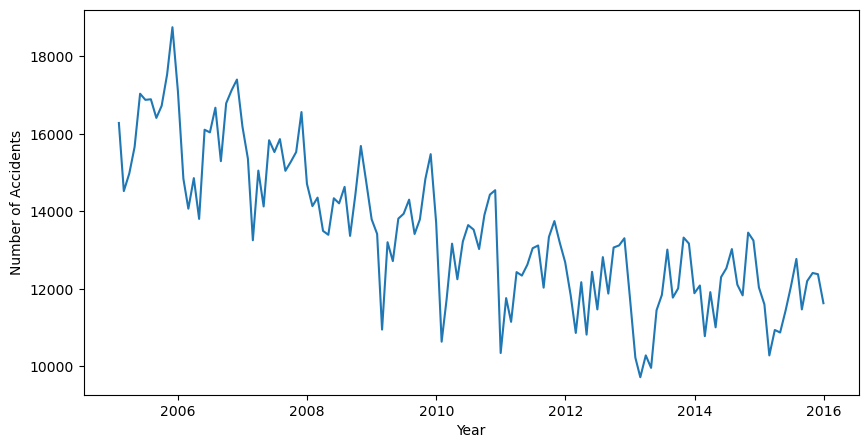

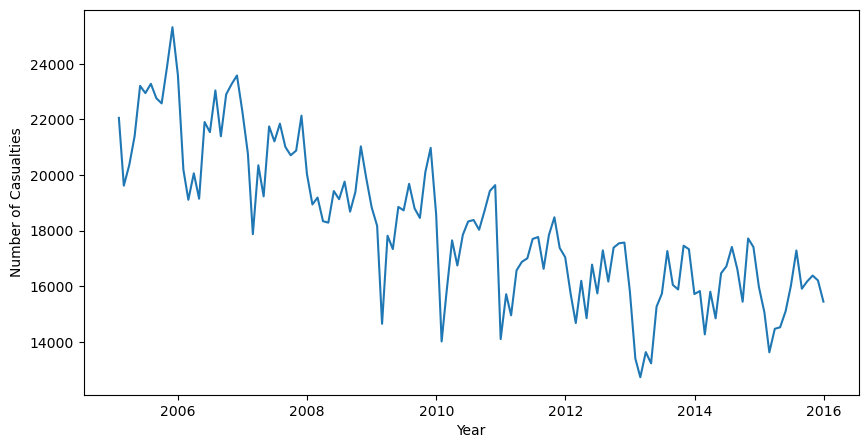

In [77]:
# Loading the dataset
d = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Accidents0515.csv')

# Converting the 'Date' column to a datetime object
d['Date'] = pd.to_datetime(d['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index of the dataframe
d = d.set_index('Date')

# Create a time series plot for the number of accidents versus time
accidents_ts = d['Accident_Index'].resample('M').count()
plt.figure(figsize=(10,5))
plt.plot(accidents_ts)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# Creating a time series plot for number of casualties versus time
casualties_ts = d['Number_of_Casualties'].resample('M').sum()
plt.figure(figsize=(10,5))
plt.plot(casualties_ts)
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.show()

#Plotting the graphs for Number of accidents and number of casualities occured per year

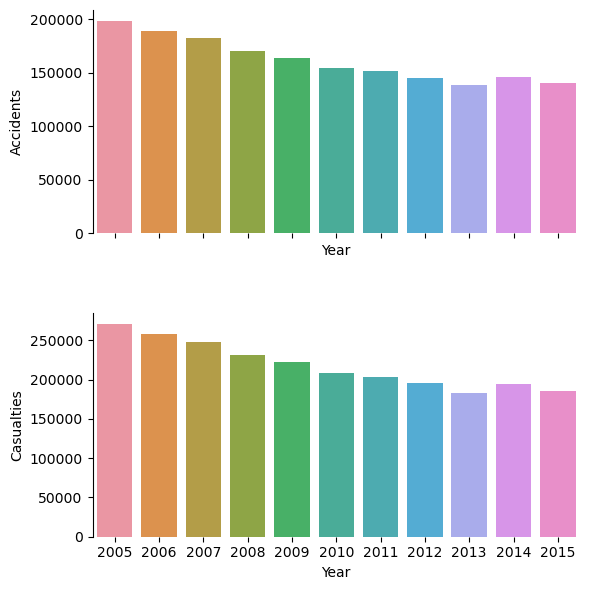

In [80]:
#Loading the dataset
accidents = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Accidents0515.csv', index_col=False)

# Converting the 'Date' column to a datetime object
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')

# Creating a new column for the year
accidents['Year'] = accidents['Date'].dt.year

# Groupby the accidents per year and calculate the number of accidents and casualties
accidents_by_year = accidents.groupby('Year').agg({'Accident_Index': 'count', 'Number_of_Casualties': 'sum'}).reset_index()

# Creating a bar plot for the number of accidents and casualties
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
sns.barplot(x='Year', y='Accident_Index', data=accidents_by_year, ax=ax1)
sns.barplot(x='Year', y='Number_of_Casualties', data=accidents_by_year, ax=ax2)

# Plotting the labels and title
ax1.set_ylabel("Accidents")
ax2.set_ylabel("Casualties")
ax2.set_xlabel("Year")
plt.tight_layout(h_pad=4)
sns.despine(bottom=True)

#Accidents based on the light conditions

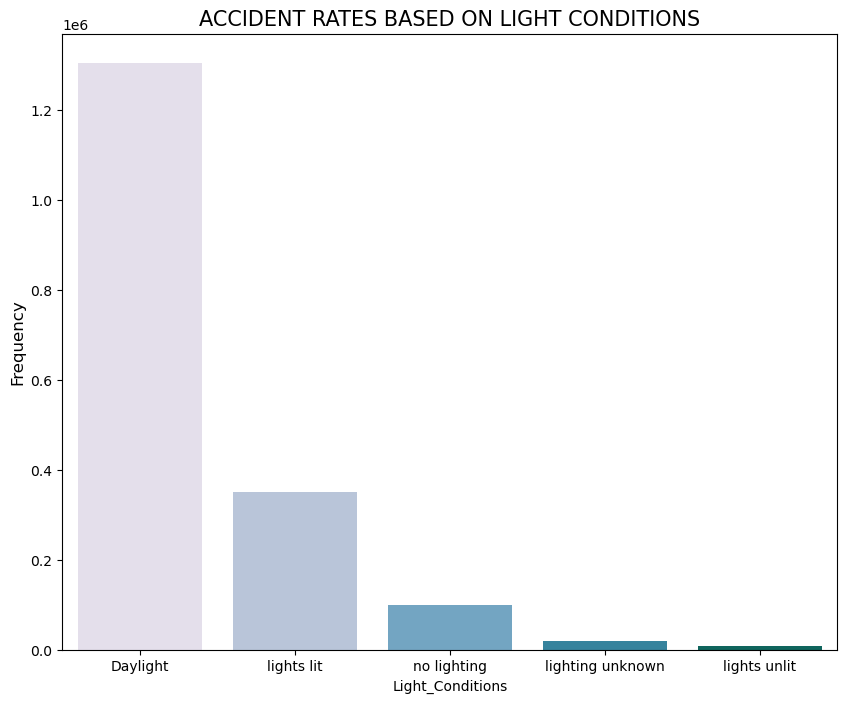

In [81]:
plt.figure(figsize=(10,8))
a=sns.countplot('Light_Conditions',data=accidents,
                 order = accidents["Light_Conditions"].value_counts().index,
                 palette = "PuBuGn") 
a.set_xticklabels(['Daylight','lights lit',
                    'no lighting',
                    'lighting unknown',
                    'lights unlit'])
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=15)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

#GEOGRAPHICAL ANALYSIS

In [82]:
data = pd.read_csv('/Users/shalinimopuri/Desktop/archive/Accidents0515.csv')

In [83]:
datad = data.iloc[0:1000]

#Creating a map for Number of accidents occured in the region

In [84]:
loc = datad['Latitude'].mean(), datad['Longitude'].mean()
m = folium.Map(location=loc,zoom_start=15)

for i in range(0,len(datad)):
       
    popup = folium.Popup('Accident', parse_html=True) 
    folium.Marker([datad['Latitude'].iloc[i],datad['Longitude'].iloc[i]],popup=popup).add_to(m)
m

#Creating a map for Number of casualities occured in the region

In [85]:
loc = datad['Latitude'].mean(), datad['Longitude'].mean()
m = folium.Map(location=loc,zoom_start=15)

for i in range(0,len(datad)):
    num_of_casualties = datad['Number_of_Casualties'].iloc[i]
    if num_of_casualties == 1:
        color = 'blue'
    elif num_of_casualties == 2:
        color = 'white'
    else:
        color = 'red'
    
    popup = folium.Popup('Accident', parse_html=True) 
    folium.Marker([datad['Latitude'].iloc[i],datad['Longitude'].iloc[i]],popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(m)



In [86]:
m

#Scatterplot for Accident severity in the area

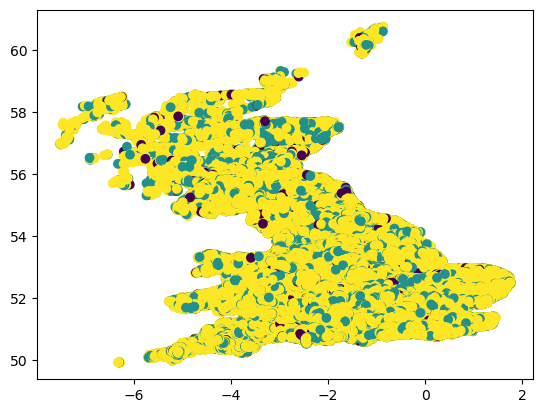

In [87]:
plt.scatter(accidents.Longitude,accidents.Latitude,c = accidents.Accident_Severity)